## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [11]:
import os
import keras
# os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt
plt.style.use('ggplot')

train, test = keras.datasets.cifar10.load_data()

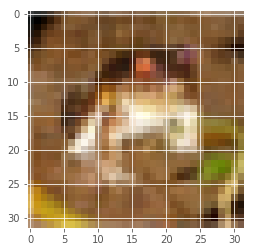

In [12]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

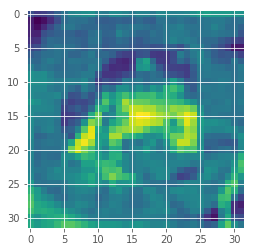

In [13]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* imaages (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

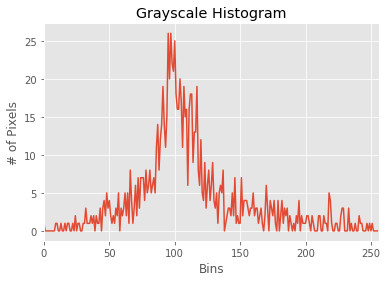

In [14]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


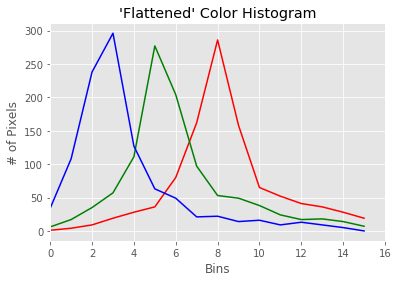

In [33]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
pixels = {}

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    pixels[color] = hist
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()

In [63]:
bins = list(range(0, 256, 16))
pixel_data = {color: list(pixels[color]) for color in colors}

In [64]:
pixel_df = pd.DataFrame(pixel_data, index=bins, columns=colors).T

In [65]:
pixel_df

,0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240
r,[1.0],[4.0],[9.0],[19.0],[28.0],[36.0],[80.0],[162.0],[286.0],[158.0],[65.0],[52.0],[41.0],[36.0],[28.0],[19.0]
g,[6.0],[17.0],[35.0],[57.0],[111.0],[277.0],[204.0],[97.0],[53.0],[49.0],[38.0],[24.0],[17.0],[18.0],[14.0],[7.0]
b,[34.0],[108.0],[238.0],[296.0],[127.0],[63.0],[49.0],[21.0],[22.0],[14.0],[16.0],[9.0],[13.0],[9.0],[5.0],[0.0]



在 [16,32] bin 中顏色:r 有 4 個 Pixel

在 [16,32] bin 中顏色:g 有 17 個 Pixel

在 [16,32] bin 中顏色:b 有 108 個 Pixel